hippocampuseducation  learning pattens and prediction models 
import libraries



In [54]:
# LOADING NECESSARY LIBRARIES

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import datetime
import time
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [55]:
#make wider graphs
sns.set(rc={'figure.figsize':(12,5)});
plt.figure(figsize=(12,5));

<Figure size 864x360 with 0 Axes>

In [16]:
# READING THE DATA SET

df = pd.read_csv('hippo.csv') 

In [2]:
df = pd.read_csv('courses.csv')

In [ ]:
df = pd.read_csv('assessments.csv')

In [56]:
df = pd.read_csv('set2.csv')

In [57]:


df.head()



,student_ID;Q1_duaration;Q2_rate;Q3_rate;Q4_rate;Q5_rate;Q1_mark;Q2_mark;Q3_Mark;Q4_Mark;Q5_Mark
0,2425844;9;2;8;0;0;fail;pass;pass;pass;fail
1,2466429;8;1h42;0;0;0;pass;fail;fail;fail;fail
2,2387231;38;3h52m;3;4;0;fail;fail;pass;fail;fail
3,2489211;0;;0;0;0;0;fail;fail;fail;fail
4,2455304;0;0;;0;0;0;fail;fail;fail;fail


In [58]:
df.tail()

,student_ID;Q1_duaration;Q2_rate;Q3_rate;Q4_rate;Q5_rate;Q1_mark;Q2_mark;Q3_Mark;Q4_Mark;Q5_Mark
13,2256349;0;0;0;0;0;0;0;0;0;0
14,2242332;0;0;0;0;0;0;0;0;0;0
15,1603806;10;22;9;4;0;0;0;0;0;0
16,2429308;15;0;0;5;fail;fail;fail;fail;pass;fail
17,2443532;0;0;0;0;0;fail;fail;fail;fail;fail


In [59]:
col_names=['student_ID', 'Q1_duaration', 'Q2_rate', 'Q3_rate','Q4_rate','Q5_rate','Q1_mark','Q2_mark','Q3_Mark','Q4_Mark','Q5_Mark'] 
df = pd.read_csv('set2.csv', names=col_names)

In [60]:
os.listdir()

['.ipynb_checkpoints',
 'assessments.csv',
 'courses.csv',
 'hippo.csv',
 'hippocampusdataset.csv',
 'hippoMODELS.ipynb',
 'set2.csv',
 'set2.xlsx',
 'Untitled9.ipynb',
 '~$set2.xlsx']

In [61]:
df.head()

,student_ID,Q1_duaration,Q2_rate,Q3_rate,Q4_rate,Q5_rate,Q1_mark,Q2_mark,Q3_Mark,Q4_Mark,Q5_Mark
0,student_ID;Q1_duaration;Q2_rate;Q3_rate;Q4_rat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2425844;9;2;8;0;0;fail;pass;pass;pass;fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2466429;8;1h42;0;0;0;pass;fail;fail;fail;fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2387231;38;3h52m;3;4;0;fail;fail;pass;fail;fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2489211;0;;0;0;0;0;fail;fail;fail;fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# IS THERE ANY NAN VALUE IN THE DATA SET?

df.isnull().sum()

student_ID       0
Q1_duaration    19
Q2_rate         19
Q3_rate         19
Q4_rate         19
Q5_rate         19
Q1_mark         19
Q2_mark         19
Q3_Mark         19
Q4_Mark         19
Q5_Mark         19
dtype: int64

In [44]:


# DEALING THE NAN DATA only in q2_rates

df['Q2_rate'] = df['Q2_rate'].fillna('-')



In [51]:
df = pd.read_csv('set2.csv', skipinitialspace=True)
# See the keys
print(df)
# See content in 'Q2_rate'
print(df.Q2_rate)

   student_ID;Q1_duaration;Q2_rate;Q3_rate;Q4_rate;Q5_rate;Q1_mark;Q2_mark;Q3_Mark;Q4_Mark;Q5_Mark
0          2425844;9;2;8;0;0;fail;pass;pass;pass;fail                                             
1       2466429;8;1h42;0;0;0;pass;fail;fail;fail;fail                                             
2     2387231;38;3h52m;3;4;0;fail;fail;pass;fail;fail                                             
3              2489211;0;;0;0;0;0;fail;fail;fail;fail                                             
4              2455304;0;0;;0;0;0;fail;fail;fail;fail                                             
5         1849534;18;0;0;0;0;fail;fail;fail;fail;fail                                             
6              2483688;2d6h00;0;0;0;0;0;0;0;fail;fail                                             
7                   2328014;0;0;0;0;0;0;0;0;fail;fail                                             
8                   2431095;0;0;0;0;0;0;0;0;fail;fail                                             
9         

AttributeError: 'DataFrame' object has no attribute 'Q2_rate'

In [45]:
# ANALYSING THE DATA TYPES

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   student_ID    19 non-null     object 
 1   Q1_duaration  0 non-null      float64
 2   Q2_rate       19 non-null     object 
 3   Q3_rate       0 non-null      float64
 4   Q4_rate       0 non-null      float64
 5   Q5_rate       0 non-null      float64
 6   Q1_mark       0 non-null      float64
 7   Q2_mark       0 non-null      float64
 8   Q3_Mark       0 non-null      float64
 9   Q4_Mark       0 non-null      float64
 10  Q5_Mark       0 non-null      float64
dtypes: float64(9), object(2)
memory usage: 1.8+ KB


In [ ]:
# ELIMINATING UNNECESSARY COLUMNS

df = df.drop(columns=['Launch Date', 'Year', 'Honor Code Certificates', '% Certified of > 50% Course Content Accessed',
                      '% Played Video', '% Grade Higher Than Zero', 'Total Course Hours (Thousands)',
                      'Median Hours for Certification'])
df.head()

In [9]:
def DescriptiveStatistics(df):
    print("No of rwos and columns information:",df.shape)
    print("")
    print("---"*20)
    print("")
    print("Columns:")
    print("")
    print(df.columns.values)
    print("---"*20)
    print("")
    print(df.info())
    print("---"*20)
    print("")
    print(df.describe())

In [6]:


DescriptiveStatistics(df)



No of rwos and columns information: (22, 1)

------------------------------------------------------------

Columns:

['code_module, "Q1_passed", "Q2_PassAtempts",']
------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 1 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   code_module, "Q1_passed", "Q2_PassAtempts",  22 non-null     object
dtypes: object(1)
memory usage: 304.0+ bytes
None
------------------------------------------------------------

       code_module, "Q1_passed", "Q2_PassAtempts",
count                                           22
unique                                          15
top                        Chemistry,"2014J","269"
freq                                             3


In [36]:
def CheckMissingInfo(df):
    print(df.isnull().sum())
    print("---"*20)
    print("")
    df_na = (df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :df_na})
    print(missing_data)

In [37]:


CheckMissingInfo(df)



student_id;start_assesment ;end_assesment;video duaration for set1;date;question_1;question_1.1;view_solution;q_1.1.1;q1.2;q1.1.2;watch video ;q1.1.3;text book;1.3;Explanation;duaration_1;lecture;q2;q2.1;q2.1.1;q 2.1.2;q2.1.3;duaration q2                                                                                                          0
2nd attempt;q2.2;q2.3;see explanation;view solution;textbook;lecture;video;q3;q3.1;q3.2;duaration q3                                                                                                                                                                                                                                                   14
2nd attempt;q3.3;q3.1.1;q 3.1.2;q3.1.3;q3.1.1;view_solution;Video;textbook;lecture;see explanation;q4;q4.1;view solution;q4.1.1;video;q4.1.2;q4.2;q4.1.3;q4.3;duaration for 2nd attem q4;lecture;textbook;see explanation;q5;q 5.1;q 5.1.1;q5.1.2;q5.1.3;q5.2;q5.3;duaration on q5 2nd attempt;view solution;Video;t

In [10]:
def GetColumnCount(df):
    int_columns = [col for col in df.columns if(df[col].dtype != "object")]
    print("No of integer type columns:",len(int_columns))
    print(int_columns)
    print("")
    obj_columns = [col for col in df.columns if(df[col].dtype == "object")]
    print("No of object type columns:",len(obj_columns))
    print(obj_columns)
    return int_columns,obj_columns

In [11]:
int_columns,obj_columns = GetColumnCount(df)

No of integer type columns: 0
[]

No of object type columns: 1
['student_ID;Q1_duaration;Q2_rate;Q3_rate;Q4_rate;Q5_rate;Q1_mark;Q2_mark;Q3_Mark;Q4_Mark;Q5_Mark']


VISUALS OF THE DATASET bold text

In [12]:
def GetCountPlots(df,obj_columns):
    for col in obj_columns:
        if(len(df[col].value_counts()) < 5):
            plt.figure(figsize=(5,5))
        else:
            plt.figure(figsize=(12,6))
        print(sns.countplot(x=col, data=df, palette="muted"))
        plt.show()

<AxesSubplot:ylabel='Density'>

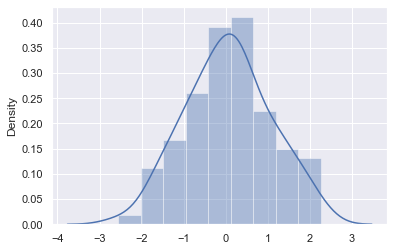

In [13]:
sns.set(); np.random.seed(0)
x = np.random.randn(100)

sns.distplot(x)

In [14]:
pip install -U statsmodels

C:\Users\boitu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


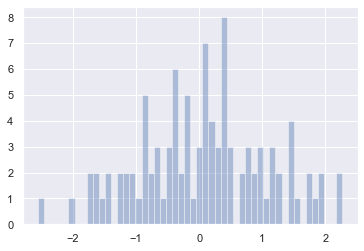

In [43]:
sns.distplot(x, bins=50, kde=False)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


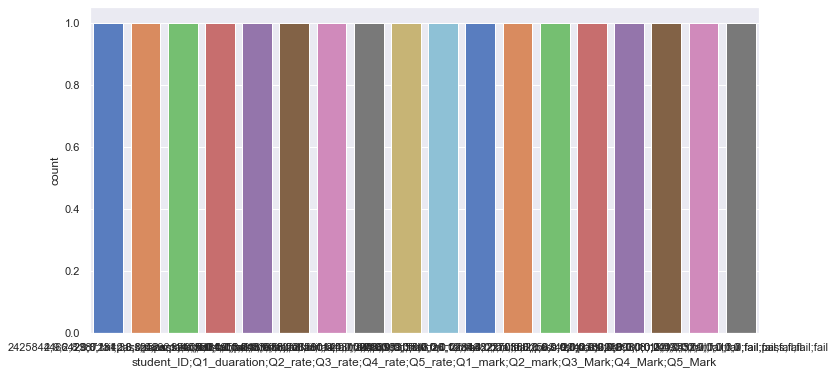

In [15]:
#bargraph of the learning events 

GetCountPlots(df,obj_columns)



In [16]:


def GetCardinality(df,obj_columns):
    for col in obj_columns:
        print("{0} :: {1}".format(col,len(df[col].value_counts())))
        
        print(df[col].value_counts())
        print("")



In [17]:


GetCardinality(df,obj_columns)



student_ID;Q1_duaration;Q2_rate;Q3_rate;Q4_rate;Q5_rate;Q1_mark;Q2_mark;Q3_Mark;Q4_Mark;Q5_Mark :: 18
2425844;9;2;8;0;0;fail;pass;pass;pass;fail            1
2466429;8;1h42;0;0;0;pass;fail;fail;fail;fail         1
2429308;15;0;0;5;fail;fail;fail;fail;pass;fail        1
1603806;10;22;9;4;0;0;0;0;0;0                         1
2242332;0;0;0;0;0;0;0;0;0;0                           1
2256349;0;0;0;0;0;0;0;0;0;0                           1
2270366;0;0;0;0;0;0;0;0;0;0                           1
2284382;0;0;0;0;0;0;0;0;0;0                           1
2298399;1h18;26;12;1h42;5;fail;fail;pass;fail;pass    1
2483953;57;0;0;0;0;fail;0;0;fail;fail                 1
2431095;0;0;0;0;0;0;0;0;fail;fail                     1
2328014;0;0;0;0;0;0;0;0;fail;fail                     1
2483688;2d6h00;0;0;0;0;0;0;0;fail;fail                1
1849534;18;0;0;0;0;fail;fail;fail;fail;fail           1
2455304;0;0;;0;0;0;fail;fail;fail;fail                1
2489211;0;;0;0;0;0;fail;fail;fail;fail                1
23

In [19]:
# COURSE SUPPLIERS

sns.countplot(x='student_ID', data=df);
df['Q1_duaration'].value_counts()

ValueError: Could not interpret input 'student_ID'

In [ ]:


# AGE DISTRIBUTION FOR ALL OF THE COURSES



df['Median Age'].hist()
plt.title('Age Distribution For All the Courses')
plt.xlabel('Student Ages');

In [ ]:

# ANALYSING THE COURSE CATEGORIES



print(df['Course Subject'].value_counts())
df['Course Subject'].value_counts().plot(kind='barh')
plt.title('Nu of Courses in the Subject Category');



In [ ]:



# INITIAL STATISTICS OF THE COLUMNS

df.describe().T



In [48]:
def GetCountPlots_with_hue(df,obj_columns,col_hue):
    for col in obj_columns:
        if(len(df[col].value_counts()) < 5):
            plt.figure(figsize=(5,5))
        else:
            plt.figure(figsize=(12,6))
        #print(sns.countplot(x=col, data=df, palette="muted"))
        sns.countplot(x=col,data = df, hue=col_hue,palette='bright')
        plt.show()

In [ ]:


GetCountPlots_with_hue(df,obj_columns,'Class')



In [ ]:
def GetBoxPlots(df,x_col):
    for col in int_columns:
        plt.figure(figsize=(5,5))
        boxplot1 = sns.boxplot(x=x_col, y=col, data=df)
        boxplot1 = sns.swarmplot(x=x_col, y=col, data=df, color=".15")
        plt.show()
        

In [ ]:
df['Failed'] = np.where(df['Class']=='L',1,0)


In [ ]:
df['AbsBoolean'] = df['views video']
df['AbsBoolean'] = np.where(df['AbsBoolean'] == 'Under-7',0,1)
df['AbsBoolean'].groupby(df['Topic']).mean()

In [ ]:


df.head()



In [ ]:


df.info()




In [ ]:
def NumaricVariablesDistributions(df):
    int_columns=df.columns[df.dtypes==int]
    plt.figure(figsize=(10,7))
    for i, column in enumerate(int_columns):
        plt.subplot(3,2, i+1)
        sns.distplot(df[column], label=column, bins=10, fit=norm)
        plt.ylabel('Density');

In [ ]:
NumaricVariablesDistributions(df)  

#Features doesn't have gaussian (normal) distribution.
#As ML algorithms deal better with values, which are normally distributed